Counting the number of times a kmer appears in a DNA string

In [1]:
def PatternCount(text, pattern):
    count = 0
    for i in range(len(text) - len(pattern) + 1):
        if text[i:i + len(pattern)] == pattern:
            count += 1
    return count

In [2]:
with open("PatternCount.txt", "r") as text_pattern_file:
    lines = text_pattern_file.readlines()
    text = lines[0].strip()
    pattern = lines[1].strip()

PatternCount(text, pattern)

24

The most frequent kmer of certain length in a DNA string

In [2]:
def FrequentWords(Text, k):
    Count = {}
    for i in range(len(Text) - k + 1):
        Pattern = Text[i : k + i]
        if Pattern in Count:
            Count[Pattern] += 1
        else:
            Count[Pattern] = 1

    max_freq = max(Count.values())
    
    print(f"The k-mer(s) of length {k} with maximum frequency {max_freq} are:")
    for j,k in Count.items():
        if k == max_freq:
            print(j)

In [4]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FrequentWords(text, kmer)

The k-mer(s) of length 12 with maximum frequency 8 are:
TAGACCATAATG
AGACCATAATGA
GACCATAATGAC
ACCATAATGACG
CCATAATGACGG
CATAATGACGGC
ATAATGACGGCT


The recursive algorithms shown below are based on the Towers of Hanoi recursion problem

In [4]:
def HanoiTowers(n, startPeg, destinationPeg):
    if n == 1:
        print(f"Move disk 1 from peg {startPeg} to peg {destinationPeg}")
        return
    transitPeg = 6 - startPeg - destinationPeg 
    # Since 1+2+3=6, 1 = startPeg, 2 = transitPeg, 3 = destinationPeg
    HanoiTowers(n - 1, startPeg, transitPeg) 
    # Move n - 1 disks from the start peg to the transit peg
    print(f"Move disk {n} from peg {startPeg} to peg {destinationPeg}")
    # Once the recursion of line 7 stops i.e., all the n - 1 disks move from peg 1 to peg 2,
    # the largest disk (disk n) moves directly to peg 3
    HanoiTowers(n - 1, transitPeg, destinationPeg)
    # Move n - 1 disks from the transit peg to the destination peg

HanoiTowers(3, 1, 3)

Move disk 1 from peg 1 to peg 3
Move disk 2 from peg 1 to peg 2
Move disk 1 from peg 3 to peg 2
Move disk 3 from peg 1 to peg 3
Move disk 1 from peg 2 to peg 1
Move disk 2 from peg 2 to peg 3
Move disk 1 from peg 1 to peg 3


Transforming a k-mer pattern into an integer

In [3]:
def SymbolToNumber(symbol):
    mapping = {'A': 0, 'C': 1, 'G': 2, 'T': 3}
    return mapping[symbol]

def PatternToNumber(pattern):
    if not pattern:
        return 0
    prefix = pattern[:-1]
    symbol = pattern[-1]
    return 4 * PatternToNumber(prefix) + SymbolToNumber(symbol)

In [7]:
PatternToNumber("AGT")

11

Transforming an integer into its k-mer pattern given the length of the kmer

In [4]:
def NumberToSymbol(number):
    mapping = {0: 'A', 1: 'C', 2: 'G', 3: 'T'}
    return mapping[number]

def NumberToPattern(index, k):
    if k == 1:
        return NumberToSymbol(index)
    prefix_index = index // 4 # Quotient
    r = index % 4 # Remainder
    symbol = NumberToSymbol(r)
    prefix_pattern = NumberToPattern(prefix_index, k - 1)
    return prefix_pattern + symbol

In [9]:
NumberToPattern(9904, 7)

'GCGGTAA'

An algorithm for finding the most frequent kmer of certain length that is faster than FrequentWords would be to create a lexicographically sorted dictionary of kmers of the specified length along with their index and populating the frequencies based on the kmer appearance in the string

In [5]:
def ComputingFrequencies(Text, k):
    frequency_array = [0] * (4 ** k)
    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        j = PatternToNumber(pattern)
        frequency_array[j] += 1
    return frequency_array
    
def FasterFrequentWords(Text, k):
    frequent_patterns = set()
    frequency_array = ComputingFrequencies(Text, k)
    max_count = max(frequency_array)
    for i in range(4**k):
        if frequency_array[i] == max_count:
            pattern = NumberToPattern(i, k)
            frequent_patterns.add(pattern)
    return frequent_patterns

In [11]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FasterFrequentWords(text, kmer)

{'ACCATAATGACG',
 'AGACCATAATGA',
 'ATAATGACGGCT',
 'CATAATGACGGC',
 'CCATAATGACGG',
 'GACCATAATGAC',
 'TAGACCATAATG'}

FrequentWords and FasterFrequentWords are fast for small k but it becomes impractical when the size of kmer is large. Therefore, a faster algorithm would be to identify identical k-mers that clump together in a sorted array

In [6]:
def FindingFrequentWordsBySorting(Text, k):
    index = []
    count = []

    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        index.append(PatternToNumber(pattern))
        count.append(1) 
        # This initiates the first sorted kmer with count 1 otherwise count[i-1] would return
        # an empty value leading to error

    sorted_index = sorted(index)

# The loop starts from 1 such that the 0th position element can also be tackled
    for i in range(1, len(sorted_index)): 
        if sorted_index[i] == sorted_index[i-1]:
            count[i] = count[i-1] + 1
        else:
            count[i] = 1

    max_count = max(count)

    frequent_patterns = set()
    for i in range(len(count)):
        if count[i] == max_count:
            pattern = NumberToPattern(sorted_index[i], k)
            frequent_patterns.add(pattern)
    return frequent_patterns

In [13]:
with open("FrequentWords.txt", "r") as text_kmer_file:
    lines = text_kmer_file.readlines()
    text = lines[0].strip()
    kmer = int(lines[1].strip())

FindingFrequentWordsBySorting(text, kmer)

{'ACCATAATGACG',
 'AGACCATAATGA',
 'ATAATGACGGCT',
 'CATAATGACGGC',
 'CCATAATGACGG',
 'GACCATAATGAC',
 'TAGACCATAATG'}

Finding the reverse complement of a DNA string

In [ ]:
def ReverseComplement(dna):
    dna = dna.replace('A','t').replace('T','a').replace('G','c').replace('C','g')
    return dna[::-1].upper() # [start:end:step]

In [18]:
# Another way
def ReverseComplement(Pattern):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    return ''.join(complement[base] for base in reversed(Pattern))

In [15]:
with open("ReverseComplement.txt", "r") as text:
    string = text.read().strip()

rev_comp = ReverseComplement(string)

with open("ReverseComplement_output.txt", "w") as rev_comp_text:
    rev_comp_text.write(rev_comp)

Identifying the starting positions where a Pattern appears as a substring of Genome

In [8]:
def PatternMatching(Pattern, Genome):
    pos = []
    for i in range(len(Genome)):
        if Genome[i:len(Pattern) + i] == Pattern:
            pos.append(i)
    return pos

In [17]:
with open("PatternMatching.txt", "r") as pat_genome:
    lines = pat_genome.readlines()
    pattern = lines[0].strip()
    genome = lines[1].strip()
            
result = PatternMatching(pattern, genome)

with open("PatternMatching_output.txt", "w") as out_file:
    out_file.write(" ".join(map(str, result)))

Finding patterns forming clumps in a string

In [9]:
def ClumpFinding(Genome, k, t, L):
    FrequentPatterns = set()
    Clump = [0] * (4 ** k)

    for i in range(len(Genome) - L + 1):
        Text = Genome[i:i + L]
        FrequencyArray = ComputingFrequencies(Text, k)
        for index in range(4 ** k):
            if FrequencyArray[index] >= t:
                Clump[index] = 1

    for i in range(4 ** k):
        if Clump[i] == 1:
            Pattern = NumberToPattern(i, k)
            FrequentPatterns.add(Pattern)

    return FrequentPatterns

In [27]:
with open("ClumpFinding.txt") as in_file:
    file_content =  in_file.readlines()
    Genome = file_content[0].strip()
    numbers = file_content[1].strip().split(" ")
    k = int(numbers[0].strip()) # Length of kmer
    L = int(numbers[1].strip()) # Window size
    t = int(numbers[2].strip()) # Minimum number of times that a kmer of length k must appear in a stretch of length L in the Genome

result = ClumpFinding(Genome, k, t, L)
print(" ".join(result))

ACGTCACACG CTGTGTGGAG CGCCCCCCAC AACGTCACAC TTTACGGGCA GGCCTACACT TTTGAGTCAC GTGGAAACGA


A better algorithm to finding clumps by not calculating the frequency array for every window size

In [10]:
def BetterClumpFinding(Genome, k, t, L):
    FrequentPatterns = set()
    
    Clump = [0] * (4**k)

    Text = Genome[0:L]
    FrequencyArray = ComputingFrequencies(Text, k)

    for i in range(4**k):
        if FrequencyArray[i] >= t:
            Clump[i] = 1

    for i in range(1, len(Genome) - L + 1): # second window, frequency array from first window already calculated
        FirstPattern = Genome[i - 1: i - 1 + k]
        index = PatternToNumber(FirstPattern)
        FrequencyArray[index] -= 1 # the first pattern is no longer present in the second window

        LastPattern = Genome[i + L - k: i + L]
        index = PatternToNumber(LastPattern)
        FrequencyArray[index] += 1 # the last pattern has been newly introduced in the second window

        if FrequencyArray[index] >= t:
            Clump[index] = 1

    for i in range(4**k):
        if Clump[i] == 1:
            Pattern = NumberToPattern(i, k)
            FrequentPatterns.add(Pattern)

    return FrequentPatterns

In [32]:
with open("ClumpFinding.txt") as in_file:
    file_content =  in_file.readlines()
    Genome = file_content[0].strip()
    numbers = file_content[1].strip().split(" ")
    k = int(numbers[0].strip())
    L = int(numbers[1].strip())
    t = int(numbers[2].strip())

result = BetterClumpFinding(Genome, k, t, L)
print(" ".join(result))

ACGTCACACG CTGTGTGGAG CGCCCCCCAC AACGTCACAC TTTACGGGCA GGCCTACACT TTTGAGTCAC GTGGAAACGA


Estimating the running time of the ClumpFinding problem

In [33]:
import time

start_time = time.time()
result = ClumpFinding(Genome, k, t, L)
end_time = time.time()

print(f"Time taken by ClumpFinding function: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = BetterClumpFinding(Genome, k, t, L)
end_time = time.time()

print(f"Time taken by BetterClumpFinding function: {end_time - start_time:.4f} seconds")

Time taken by ClumpFinding function: 87.1448 seconds
Time taken by BetterClumpFinding function: 0.1459 seconds


Finding kmers that form clumps for E-coli

In [34]:
import time

ecoli_genome = open("E_coli_genome.txt").read()
k = 9
t = 3
L = 500

start_time = time.time()
result = BetterClumpFinding(ecoli_genome, k, t, L)
end_time = time.time()

print(f"Time taken to find kmers that form clumps in E-coli genome: {end_time - start_time:.4f} seconds")

with open("e_coli_kmer_clumps.txt", "w") as out_file:
    out_file.write("\n".join(result))

print(f"There are {len(result)} different 9-mers form (500,3)-clumps in the E. coli genome.")

Time taken to find kmers that form clumps in E-coli genome: 35.4117 seconds
There are 1904 different 9-mers form (500,3)-clumps in the E. coli genome.


Finding positions in a genome where the skew diagram attains a minimum

In [11]:
import matplotlib.pyplot as plt

def MinimumSkewProblem(filename, skew_output_file):
    start = 0
    skew = [0]

    with open(filename, 'r') as file:
        seq = file.read().strip()

    for i in seq:
        if i == 'G':
            start += 1
        elif i == 'C':
            start -= 1
        skew.append(start)

    plt.figure(figsize=(10, 4))
    plt.plot(range(len(skew)), skew)
    plt.title("Skew Diagram")
    plt.xlabel("Position in Genome")
    plt.ylabel("Skew (G - C)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    min_skew = min(skew)
    min_positions = [i for i, value in enumerate(skew) if value == min_skew]

    with open(skew_output_file, "w") as f:
        f.write(' '.join(map(str, skew)))

    print("The positions in the genome at which the skew attains the minimum:")
    for pos in min_positions:
        print(pos)

    return min_positions

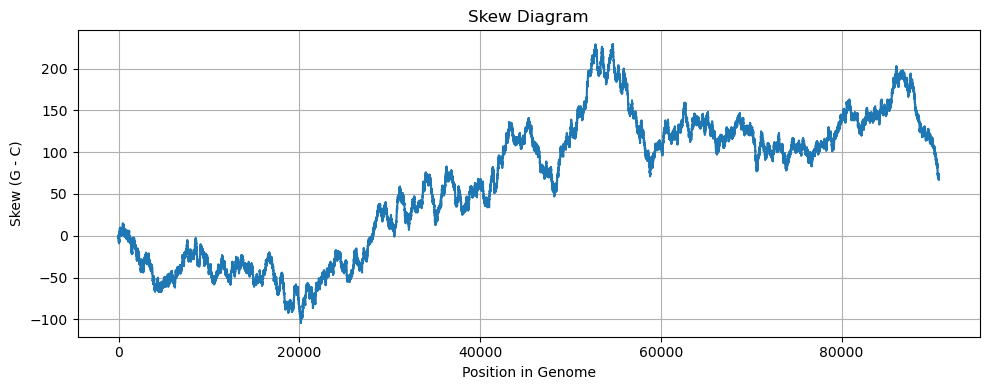

The positions in the genome at which the skew attains the minimum:
20175
20176
20179
20187


In [28]:
min_positions = MinimumSkewProblem("MinimumSkewProblem.txt", skew_output_file = "skew_values.txt")

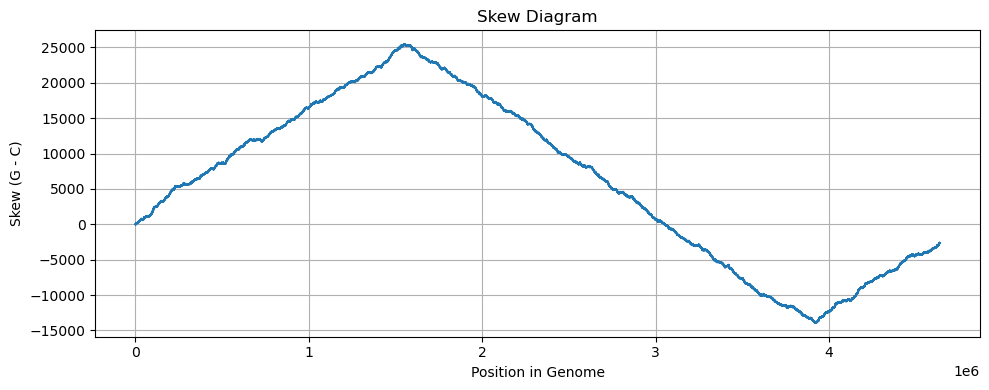

The positions in the genome at which the skew attains the minimum:
3923620
3923621
3923622
3923623


In [29]:
# Skew diagram for E-coli
min_positions = MinimumSkewProblem("E_coli_genome.txt", skew_output_file = "skew_values.txt")

Computing the number of mismatches between two string called the Hamming distance

In [12]:
def HammingDistance(p, q):
    mismatch = 0
    for i in range(len(p)):
        if p[i] != q[i]:
            mismatch += 1
    return mismatch

In [32]:
with open("HammingDistance_strings.txt") as f:
    strings = f.readlines()
    string1 = strings[0].strip()
    string2 = strings[1].strip()

result = HammingDistance(string1, string2)
print(f"The number of mismatches between two string is: {result}")

The number of mismatches between two string is: 846


Finding all approximate occurrences of a pattern in a string

In [21]:
def ApproximatePatMatch(Text, Pattern, d):
    count = 0
    positions = []

    for i in range(len(Text) - len(Pattern) + 1):
        Pattern_Text = Text[i:i+len(Pattern)]
        if HammingDistance(Pattern, Pattern_Text) <= d:
            positions.append(i)
            count += 1

    # print(f"Number of approximate pattern counts: {count}")
    # return positions
    return count

In [50]:
with open("ApproximatePatMatch.txt") as f:
    all = f.readlines()
    Pattern = all[0].strip()
    Text = all[1].strip()
    d = int(all[2].strip())

result = ApproximatePatMatch(Text, Pattern, d)

with open("ApproximatePatMatch_starting_pos.txt", "w") as f:
    f.write(' '.join(map(str, result)))

Number of approximate pattern counts: 33


Generating d-neigborhood of the Pattern i.e., the set of all k-mers whose Hamming distance from Pattern does not exceed d

In [14]:
# 1-neigborhood of Pattern
def immediate_neighbors(pattern):
    neighborhood = []
    for i in range(len(pattern)):
        symbol = pattern[i]
        for nucleotide in 'ACGT':
            if nucleotide != symbol:
                neighbor = pattern[:i] + nucleotide + pattern[i+1:]
                neighborhood.append(neighbor)
    return neighborhood

pattern = "ATC"
neighbors = immediate_neighbors(pattern)
print(neighbors)

['CTC', 'GTC', 'TTC', 'AAC', 'ACC', 'AGC', 'ATA', 'ATG', 'ATT']


In [15]:
def Neighbors(Pattern, d):
    if d == 0:
        return {Pattern}
    if len(Pattern) == 1:
        return {'A', 'C', 'G', 'T'}

    neighborhood = set()
    suffix_neighbors = Neighbors(Pattern[1:], d)
    for neighbor in suffix_neighbors:
        if HammingDistance(Pattern[1:], neighbor) < d:
            for nucleotide in {'A', 'C', 'G', 'T'}:
                neighborhood.add(nucleotide + neighbor) # the kmers with 1 mismatch in nucleotide + < d mismatch in neighbor
        else:
            neighborhood.add(Pattern[0] + neighbor) # the kmers with 0 mismatch in first symbol + d mismatch in neighbor
    return neighborhood

In [59]:
with open("Neighbors.txt") as f:
    all = f.readlines()
    Pattern = all[0].strip()
    d = int(all[1].strip())

with open("Neighbors_output.txt", "w") as f:
    f.write('\n'.join(Neighbors(Pattern, d)))

In [68]:
result = Neighbors("ATC", 2)
' '.join(result)

'GCC ATA TTA AGT GAC TTT TAC GTC AAC CTA CAC TCC AAG ATG CTG GGC AAT TTC AGA AGC AAA GTG ACG TTG GTA GTT CCC TGC ACC CTC ACA ATT AGG CGC CTT ATC ACT'

Generating all k-mers of Hamming distance exactly d from Pattern

In [16]:
def ExactNeighbors(Pattern, d):
    if d == 0:
        return set() # No mismatches allowed, but we want exactly d
    if len(Pattern) == 1:
        # Only include bases that are different if d == 1
        return {'A', 'C', 'G', 'T'} - {Pattern} if d == 1 else set() # This works like set subtraction operation
    
    neighborhood = set()
    suffix_neighbors = ExactNeighbors(Pattern[1:], d) | ExactNeighbors(Pattern[1:], d - 1)
    for neighbor in suffix_neighbors:
        hd = HammingDistance(Pattern[1:], neighbor)
        if hd == d:
            # No mismatch allowed at the first character
            neighborhood.add(Pattern[0] + neighbor)
        elif hd == d - 1:
            # Introducing a mismatch at the first character
            for nucleotide in {'A', 'C', 'G', 'T'} - {Pattern[0]}:
                neighborhood.add(nucleotide + neighbor)
    return neighborhood

In [66]:
result = ExactNeighbors("ATC", 2)
' '.join(result)

'GTG AAG TTA ACG ACA CTG TTG GTA GTT AGT AAT AGG TTT CTT AGA ACT AAA CTA'

Building the d-neighborhood of a string iteratively instead of recursively

In [17]:
def IterativeNeighbors(Pattern, d):
    Neighborhood = {Pattern}
    for _ in range(d):
        NewNeighborhood = set()
        for pattern in Neighborhood:
            NewNeighborhood.update(immediate_neighbors(pattern))
        Neighborhood = Neighborhood.union(NewNeighborhood)
    
    return Neighborhood

In [67]:
result = IterativeNeighbors("ATC", 2)
' '.join(result)

'GCC ATA TTA AGT GAC TTT TAC GTC AAC CTA CAC TCC AAG ATG CTG GGC AAT TTC AGA AGC AAA GTG ACG TTG GTA GTT CCC TGC ACC CTC ACA ATT AGG CGC CTT ATC ACT'

Finding the most frequent k-mers with up to d mismatches in Text

In [22]:
def FrequentWordsWithMismatches(Text, k, d):
    FrequentPatterns = set()
    FrequencyArray = [0] * (4 ** k)
    Close = [0] * (4 ** k)

    for i in range(len(Text) - k + 1):
        Neighborhood = Neighbors(Text[i:i + k], d)
        for Pattern in Neighborhood:
            index = PatternToNumber(Pattern)
            Close[index] = 1

    for i in range(4 ** k):
        if Close[i] == 1:
            Pattern = NumberToPattern(i, k)
            FrequencyArray[i] = ApproximatePatMatch(Text, Pattern, d)

    maxCount = max(FrequencyArray)

    for i in range(4 ** k):
        if FrequencyArray[i] == maxCount:
            Pattern = NumberToPattern(i, k)
            FrequentPatterns.add(Pattern)

    return FrequentPatterns

In [24]:
with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FrequentWordsWithMismatches(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: GAAGAA


A faster algorithm to find frequent words with mismatches by sorting

In [25]:
def FindingFrequentWordsWithMismatchesBySorting(Text, k, d):
    NeighborhoodArray = []

    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        neighbors = Neighbors(pattern, d)
        NeighborhoodArray.extend(neighbors) # There can be duplicate entries

    Index = [PatternToNumber(pattern) for pattern in NeighborhoodArray]
    Count = [1] * len(Index)

    # enumerate gives both the original index and the values and x[1] sorts by the second element i.e., the values
    SortedIndex = sorted(enumerate(Index), key=lambda x:x[1])

    for i in range(1, len(SortedIndex)):
        # If there are two adjacent identical kmers, the count list is updated
        if SortedIndex[i][1] == SortedIndex[i-1][1]:
            Count[SortedIndex[i][0]] = Count[SortedIndex[i-1][0]] + 1

    maxCount = max(Count)
    FrequentPatterns = set()

    for i, count in enumerate(Count):
        if count == maxCount:
            pattern = NumberToPattern(Index[i], k)
            FrequentPatterns.add(pattern)

    return FrequentPatterns

In [26]:
with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FindingFrequentWordsWithMismatchesBySorting(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: GAAGAA


In [27]:
import time

with open("FrequentWordsWithMismatches.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

start_time = time.time()
result = FrequentWordsWithMismatches(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches without sorting: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = FindingFrequentWordsWithMismatchesBySorting(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches with sorting: {end_time - start_time:.4f} seconds")

Time taken to find most frequent kmers with up to d mismatches without sorting: 0.8026 seconds
Time taken to find most frequent kmers with up to d mismatches with sorting: 0.1801 seconds


Finding the most frequent k-mers (with mismatches and reverse complements) in Text

In [28]:
def FindingFrequentWordsWithMismatchesBySortingAndReverseComplements(Text, k, d):
    NeighborhoodArray = []

    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        neighbors = Neighbors(pattern, d)
        rev_neighbors = Neighbors(ReverseComplement(pattern), d)
        NeighborhoodArray.extend(neighbors)
        NeighborhoodArray.extend(rev_neighbors)

    Index = [PatternToNumber(pattern) for pattern in NeighborhoodArray]
    Count = [1] * len(Index)

    SortedIndex = sorted(enumerate(Index), key=lambda x:x[1])

    for i in range(1, len(SortedIndex)):
        if SortedIndex[i][1] == SortedIndex[i-1][1]:
            Count[SortedIndex[i][0]] = Count[SortedIndex[i-1][0]] + 1

    maxCount = max(Count)
    FrequentPatterns = set()

    for i, count in enumerate(Count):
        if count == maxCount:
            pattern = NumberToPattern(Index[i], k)
            FrequentPatterns.add(pattern)

    return FrequentPatterns

In [35]:
with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FindingFrequentWordsWithMismatchesBySortingAndReverseComplements(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: ATATAT


A faster algorithm to find frequent words with mismatches and reverse complements by using a hash map

In [30]:
from collections import defaultdict

def FrequentWordsWithMismatchesAndReverseComplements(Text, k, d):
    frequency_map = defaultdict(int)
    for i in range(len(Text) - k + 1):
        pattern = Text[i:i + k]
        neighborhood = Neighbors(pattern, d)
        for approx_pattern in neighborhood:
            rev_comp = ReverseComplement(approx_pattern)
            frequency_map[approx_pattern] += 1
            frequency_map[rev_comp] += 1

    max_count = max(frequency_map.values())
    return [pattern for pattern, count in frequency_map.items() if count == max_count]

In [36]:
with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

result = FrequentWordsWithMismatchesAndReverseComplements(Text, k, d)
print(f"Most frequent k-mers with up to d mismatches are: {' '.join(result)}")

Most frequent k-mers with up to d mismatches are: ATATAT


In [37]:
import time

with open("FrequentWordsWithMismatchesAndReverseComplement.txt") as f:
    all =f.readlines()
    Text = all[0].strip()
    k = int((all[1].split(" "))[0])
    d = int((all[1].split(" "))[1])

start_time = time.time()
result = FindingFrequentWordsWithMismatchesBySortingAndReverseComplements(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches and reverse complements by sorting: {end_time - start_time:.4f} seconds")

start_time = time.time()
result = FrequentWordsWithMismatchesAndReverseComplements(Text, k, d)
end_time = time.time()

print(f"Time taken to find most frequent kmers with up to d mismatches and reverse complements using hash map: {end_time - start_time:.4f} seconds")

Time taken to find most frequent kmers with up to d mismatches and reverse complements by sorting: 1.1523 seconds
Time taken to find most frequent kmers with up to d mismatches and reverse complements using hash map: 0.2873 seconds


Finding the most frequent 9-mers (with 1 mismatch and reverse complements) within a window of length 500 starting at the minimum skew position i.e., 3923620 of the E. coli genome

In [39]:
genome = open('E_coli_genome.txt','r').read().strip()
k = 9
d = 1
window_start = 3923620
window_length = 500

window = genome[window_start:window_start + window_length]

result = FrequentWordsWithMismatchesAndReverseComplements(window, k, d)
with open("e_coli_ori_kmers.txt", "w") as f:
    f.write("\n".join(map(str, result)))